In [1]:
## include the source file (if you have not downloaded as a package)

include("../src/Chebyshev.jl")
import .Chebyshev as CH

include("../src/Gegenbauer.jl")
import .Gegenbauer as GE

include("../src/SpectralRadialODE.jl")
import .RadialODE as RODE

In [2]:
import Plots
using LaTeXStrings
using Plots
#using PyPlot
using LinearAlgebra
#using GenericSchur
using SparseArrays

In [3]:
T=Float64

rmin=T(-1.);
rmax=T(1.);
nr=20;


In [4]:
pts = CH.cheb_pts(rmin, rmax, nr);

In [5]:
sqr_func = pts.^2;

In [6]:
cube_func = pts.^3;

In [7]:
sqr_spec = CH.to_cheb(sqr_func);

In [8]:
pts_spec = CH.to_cheb(pts);

In [9]:
cube_spec = CH.to_cheb(cube_func);

In [10]:
sin_func = [sin(p) for p in pts];
cos_func = [cos(p) for p in pts];
sin_sqr_func = [sin(p).^2 for p in pts];

In [11]:
sin_spec = CH.to_cheb(sin_func);
cos_spec = CH.to_cheb(cos_func);
sin_sqr_spec = CH.to_cheb(sin_sqr_func);

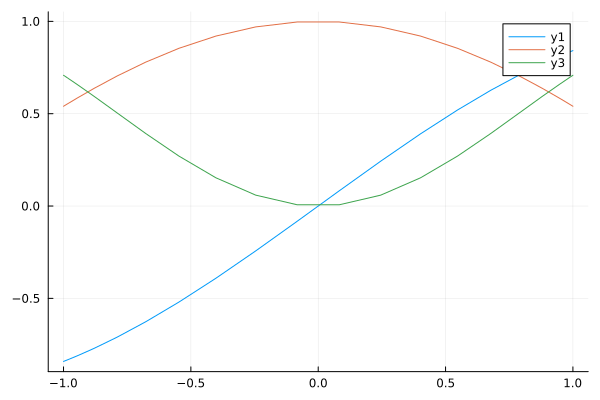

In [12]:
plot(pts,sin_func)
plot!(pts,cos_func)
plot!(pts,sin_sqr_func)

# First test multiplication matrix

In [13]:
CH.

LoadError: syntax: incomplete: premature end of input

In [14]:
M_multiply = CH.mat_C1_X(sin_spec);

In [15]:
CH.to_real(M_multiply*sin_spec)-sin_sqr_func

20-element Vector{Float64}:
 -5.551115123125783e-16
  1.1102230246251565e-16
  1.4432899320127035e-15
 -1.6653345369377348e-15
  1.1102230246251565e-16
  2.220446049250313e-16
 -7.216449660063518e-16
  1.5265566588595902e-15
 -3.885780586188048e-16
  3.2959746043559335e-17
  2.194425197110661e-16
 -4.787836793695988e-16
 -2.220446049250313e-16
  1.3877787807814457e-15
 -2.3314683517128287e-15
  1.5543122344752192e-15
 -7.771561172376096e-16
 -1.3322676295501878e-15
 -8.881784197001252e-16
  1.4432899320127035e-15

# Test derivative

In [16]:
D1 = CH.mat_C1_D1(T,nr);

In [17]:
D2 = GE.compute_D(T,nr,2);

In [18]:
S1 = GE.compute_S(T,nr,1);
S0 = GE.compute_S(T,nr,0);

In [19]:
maximum(D2*cos_spec+S1*S0*cos_spec)

1.6844226906144652e-14

In [20]:
CH.C1_to_real(D1*sin_spec)-cos_func

20-element Vector{Float64}:
 -1.099120794378905e-14
 -3.9745984281580604e-14
  1.176836406102666e-14
  1.9206858326015208e-14
 -2.6867397195928788e-14
  2.1538326677728037e-14
 -1.84297022087776e-14
  3.219646771412954e-15
  1.1324274851176597e-14
 -9.880984919163893e-15
  1.2989609388114332e-14
 -2.6756374893466273e-14
  3.4083846855992306e-14
 -2.7755575615628914e-14
  8.770761894538737e-15
  1.3100631690576847e-14
 -2.6756374893466273e-14
  4.773959005888173e-15
  3.7969627442180354e-14
  7.661116740997898e-9

In [21]:
CH.C1_to_real(D1*sqr_spec)-2*pts

20-element Vector{Float64}:
 -8.859579736508749e-14
  2.7977620220553945e-14
 -4.6629367034256575e-15
 -2.9753977059954195e-14
  3.397282455352979e-14
 -2.19824158875781e-14
  1.532107773982716e-14
 -2.6645352591003757e-15
 -8.992806499463768e-15
  4.912736883966318e-15
 -6.161737786669619e-15
  1.8762769116165146e-14
 -2.55351295663786e-14
  1.9095836023552692e-14
 -8.881784197001252e-16
 -1.3322676295501878e-14
  1.9539925233402755e-14
 -1.7541523789077473e-14
  1.3766765505351941e-14
 -3.5704772471945034e-13

In [22]:
CH.C1_to_real(D1*cube_spec)-3*sqr_func

20-element Vector{Float64}:
  9.636735853746359e-14
 -3.197442310920451e-14
  5.773159728050814e-15
  2.7977620220553945e-14
 -3.6415315207705135e-14
  2.55351295663786e-14
 -2.2537527399890678e-14
  9.270362255620057e-15
  7.105427357601002e-15
 -6.7931771319251766e-15
  8.93729534823251e-15
 -1.9068080447937064e-14
  2.892130979148533e-14
 -2.8199664825478976e-14
  9.547918011776346e-15
  9.103828801926284e-15
 -1.3322676295501878e-14
  7.993605777301127e-15
  8.43769498715119e-15
  5.981881656680343e-13

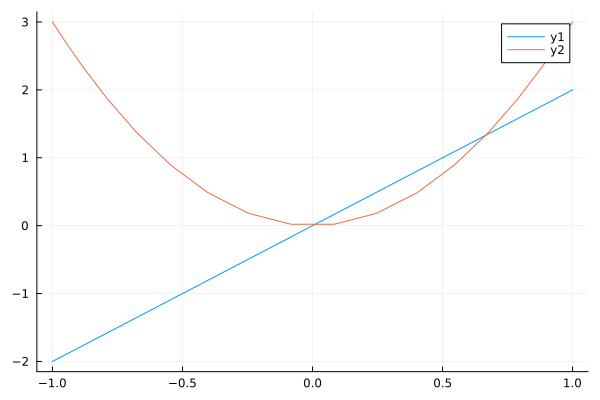

In [23]:
plot(pts,CH.C1_to_real(D1*sqr_spec))
plot!(pts,CH.C1_to_real(D1*cube_spec))


# Teukolsky Radial ODE

In [135]:
T=Float64

nr=200  # number of radial points
nl=3  # number of angular points
s=-2   # field spin
m=2    # m angular value
l=2    # l angular value
a=T(0.0)  # dimensionless black hole spin 
## QNM value near n=0,l=2,m=2, s=-2 for dimensionless spin a=0.7

omega_0= T(0.34671099687916285)-T(0.27391487529123504)*im
gamma = T(4)-T(0)*im
bhm = T(1)
rmin = T(0)
rmax = T(bhm)

1.0

In [136]:
rs = CH.cheb_pts(rmin, rmax, nr);

In [137]:
S1 = GE.compute_S(T,nr,1);
S0 = GE.compute_S(T,nr,0);

In [138]:
radial_mat = RODE.radial_discretized_eqn_c(nr,s,m,a,bhm,omega_0,gamma,rmin,rmax)

200×200 SparseMatrixCSC{ComplexF64, Integer} with 1775 stored entries:
⠻⣿⣦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠈⠻⣿⣦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠈⠻⣿⣦⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠈⠻⣿⣦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠈⠻⣿⣦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠻⣿⣦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠻⣿⣦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠻⣿⣦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠻⣿⣦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠻⣿⣆⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠻⣿⣦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠻⣿⣦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠻⣿⣦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠻⣿⣦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠻⣿⣦⡀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠻⣿⣦⡀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠻⣿⣤⡀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠻⣿⣦⡀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠻⣿⣦⡀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠻⣿

In [139]:
mat = Matrix(radial_mat);

In [140]:
nulls = nullspace(mat,rtol=1e-6);

In [141]:
nulls

200×2 Matrix{ComplexF64}:
          0.0-0.0im             -0.953101-0.0im
     0.318986-0.940289im       -0.0177276-0.0100949im
     0.050768+0.0548063im       -0.277019+0.00496217im
   0.00193198-0.0825963im       0.0497555-0.103349im
     0.028729+0.0255842im       0.0139455+0.0315731im
   -0.0140183+0.00200536im    -0.00736389+0.000672408im
  0.000444047-0.00356599im    -0.00230395-0.00135402im
    0.0012199-0.000612453im    0.00146758-0.00195876im
  0.000523204+0.00100042im    0.000816804+0.00120295im
 -0.000672124+0.000159575im   -0.00066658+0.000275054im
  -2.28963e-5-0.000370292im  -0.000128979-0.000354639im
  0.000206196-2.36987e-7im    0.000211568-6.96086e-5im
  -6.92402e-6+0.000123203im    3.21076e-5+0.000132023im
             ⋮               
  6.28434e-16+2.42972e-16im   2.74094e-17+5.61798e-17im
 -4.84671e-16+1.97148e-16im  -2.32199e-17-5.23612e-17im
  5.30889e-16-2.43145e-16im   2.38286e-17+4.86375e-17im
 -5.23198e-16+1.14967e-17im  -1.56269e-17-3.58309e-17im
  5.55366e-1

In [146]:
nulls_re = CH.to_real(nulls[:,2]);

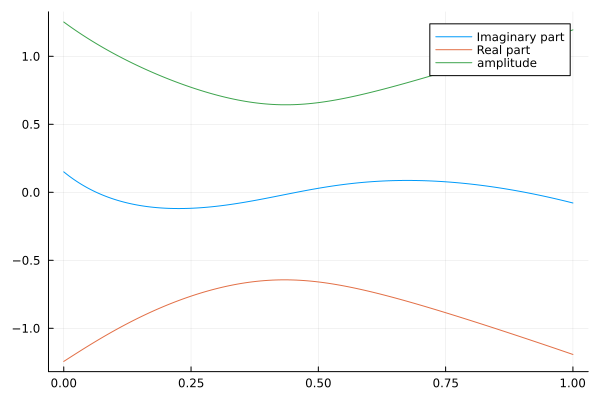

In [147]:
Plots.plot(rs,[v.im for v in nulls_re],label="Imaginary part")
Plots.plot!(rs,[v.re for v in nulls_re],label="Real part")
Plots.plot!(rs,[abs(v) for v in nulls_re],label="amplitude")


# An easy application

In [ ]:
heatmap(I, color=:grays, aspect_ratio=1)